<a href="https://colab.research.google.com/github/Msaleemakhtar/Deep-Learning-with-pytorch/blob/main/03_pytorch_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BASIC WORK FLOW OF PYTORCH

### Device agnostic code

In [26]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
torch.__version__

'2.2.1+cu121'

In [27]:
# device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using current device : {device}")


Using current device : cpu


In [28]:
# create the known parameters
weight = 0.7
bias = 0.3

# create the range
start =0
stop=1
step=0.02
# create tensors
X = torch.arange(start,stop, step).unsqueeze(dim=1)
y = weight*X + bias

In [29]:
#  split the data for training and testing
split_data = int(0.8 *len(X))
X_train, y_train = X[:split_data], y[:split_data]
X_test, y_test = X[split_data:], y[split_data:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [30]:
# plot the data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.scatter(train_data, train_labels, c="r", s=4, label = "Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label= "Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="b", s=4 , label= "predictions")


  plt.legend(prop={"size":14})


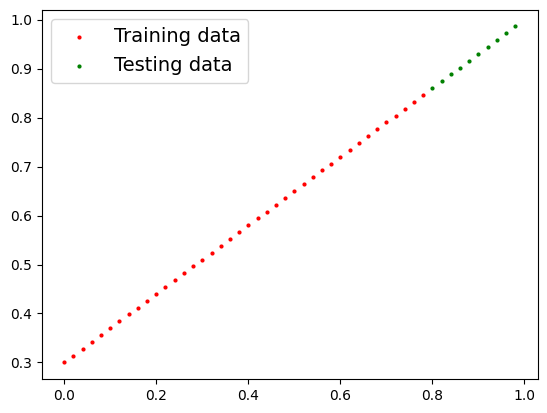

In [31]:
plot_predictions()

In [32]:
# Build the Model
class LinearRegressionModel_1(nn.Module):
  def __init__(self):
    super().__init__()

    # create the linear layer for Model parameter initialization
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  # forward propogation for prediction on input features and random intialization of model parameters
  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(33)
model_0 = LinearRegressionModel_1()
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2372]])),
             ('linear_layer.bias', tensor([0.1175]))])

In [33]:
# set the loss function
loss_fn = nn.L1Loss()

# set the optimizor
optimizor = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [41]:
# Train  and Evaluate the Model

torch.manual_seed(44)

epochs = 150

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

epoch_count = []
train_loss_values= []
test_loss_values = []
for epoch in range(epochs):
  # set thre model in traing mode
  model_0.train()

  #1. forward propogation on traing data
  y_pred = model_0(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. set the zero grad
  optimizor.zero_grad()

  # 4. backpropogation to calculate the gradients of loss function with repect to model parameters
  loss.backward()

  # 5.progress the optimizor(update the parameters)
  optimizor.step()

  # Testing the Model

  # put the model in evaluation mode
  model_0.eval()

  # set the context manager for inference with no grad
  with torch.inference_mode():

    test_pred = model_0(X_test)
    # calculate the loss on test data
    test_loss = loss_fn(test_pred,y_test )

  # Visualize the loss
  if epoch % 20 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())

    print(f"Epoch : {epoch} | loss : {loss} | test_loss : {test_loss}")

Epoch : 0 | loss : 0.024607062339782715 | test_loss : 0.057028137147426605
Epoch : 20 | loss : 0.017738372087478638 | test_loss : 0.040483057498931885
Epoch : 40 | loss : 0.010873556137084961 | test_loss : 0.024624843150377274
Epoch : 60 | loss : 0.004003198351711035 | test_loss : 0.008766645565629005
Epoch : 80 | loss : 0.003630311693996191 | test_loss : 0.005853563547134399
Epoch : 100 | loss : 0.003630311693996191 | test_loss : 0.005853563547134399
Epoch : 120 | loss : 0.003630311693996191 | test_loss : 0.005853563547134399
Epoch : 140 | loss : 0.003630311693996191 | test_loss : 0.005853563547134399


In [35]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5776]])),
             ('linear_layer.bias', tensor([0.3515]))])

In [36]:

model_0.to(device)
next(model_0.parameters()).device

device(type='cpu')

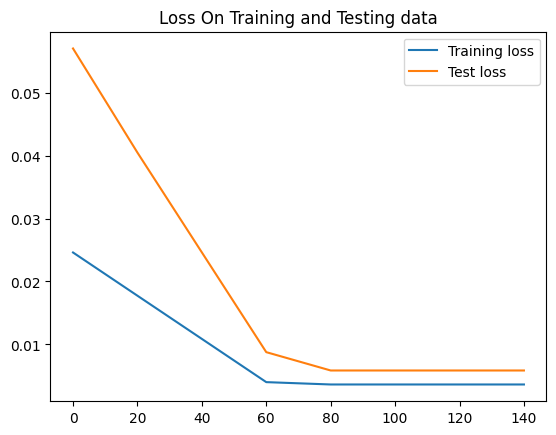

In [43]:
# loss curve
plt.plot(epoch_count, train_loss_values, label = "Training loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Loss On Training and Testing data")
plt.ylabel = "Loss"
plt.xlabel = "Epochs"
plt.legend();

In [37]:
# Make prediction

model_0.eval()
with torch.inference_mode():
  y_pred1 = model_0(X_test)

y_pred1

tensor([[0.8136],
        [0.8251],
        [0.8367],
        [0.8482],
        [0.8598],
        [0.8713],
        [0.8829],
        [0.8944],
        [0.9060],
        [0.9175]])

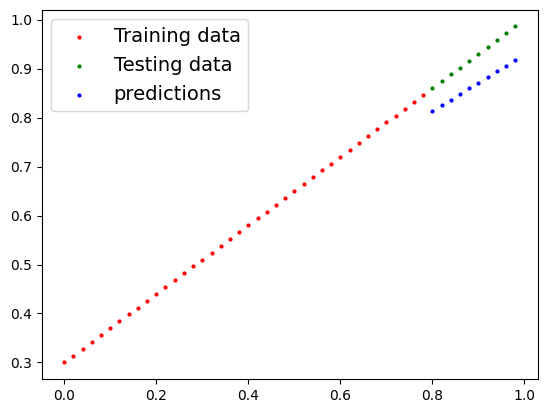

In [38]:
plot_predictions(predictions=y_pred1.cpu())

# Saving  the model

In [39]:
from pathlib import Path
# create directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
# create the save path
MODEL_NAME = "model_0_pytotchflow.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# save the model state_dict
print(f"saving the Model: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


saving the Model: Models/model_0_pytotchflow.pth


# Loading the state_dict() of saved model

In [40]:
# Instantiate the model
loaded_model = LinearRegressionModel_1()
# load the model state_dict
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

# set the device
loaded_model.to(device)

print(f"loaded model state : {loaded_model}")
print(f"loaded model parameters : {next(loaded_model.parameters()).device}")



loaded model state : LinearRegressionModel_1(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
loaded model parameters : cpu
